### Data preprocessing

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

1. Load the dataset

In [ ]:
# Load the dataset using pandas
df = pd.read_csv("../data/breast_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,M,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,...,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.29140,0.16090,0.3029,0.08216
1,2,B,11.50,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,...,12.97,22.46,83.12,508.9,0.1183,0.1049,0.08105,0.06544,0.2740,NaN
2,3,M,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.23220,0.11190,0.2809,0.06287
3,4,M,18.82,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.08744,...,22.66,30.93,145.30,1603.0,0.1390,0.3463,0.39120,0.17080,0.3007,0.08314
4,5,B,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,...,13.74,19.93,88.81,585.4,0.1483,NaN,0.22410,0.10560,0.3380,0.09584


2. Remove the 'id' column, as it does not serve any purpose in the dataset for ML training.

In [ ]:
# Remove the 'id' column
df = df.drop(columns=['id'])

3. Descriptive statistics of the dataset

In [ ]:
# Describe the dataset
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                512 non-null    object 
 1   radius_mean              505 non-null    float64
 2   texture_mean             507 non-null    float64
 3   perimeter_mean           507 non-null    float64
 4   area_mean                508 non-null    float64
 5   smoothness_mean          506 non-null    float64
 6   compactness_mean         511 non-null    float64
 7   concavity_mean           502 non-null    float64
 8   concave points_mean      504 non-null    float64
 9   symmetry_mean            507 non-null    float64
 10  fractal_dimension_mean   509 non-null    float64
 11  radius_se                510 non-null    float64
 12  texture_se               505 non-null    float64
 13  perimeter_se             511 non-null    float64
 14  area_se                  5

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,505.00000,507.000000,507.000000,508.000000,506.000000,511.000000,502.000000,504.000000,507.000000,509.000000,...,507.000000,510.000000,505.000000,505.000000,507.000000,503.000000,508.000000,501.000000,509.000000,505.000000
mean,14.17355,19.364142,92.231933,657.616929,0.096168,0.103624,0.088031,0.048893,0.181339,0.062667,...,16.313700,25.754941,107.876515,889.918812,0.131889,0.251145,0.272561,0.114208,0.289997,0.083879
std,3.55379,4.314426,24.584304,357.110765,0.014208,0.053119,0.080220,0.039362,0.027501,0.006864,...,4.885558,6.152356,34.106884,579.834235,0.023130,0.155159,0.209698,0.065945,0.061297,0.018044
min,6.98100,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.106000,0.050240,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.71000,16.195000,75.235000,420.175000,0.085843,0.064130,0.028835,0.019983,0.162100,0.057640,...,12.980000,21.222500,84.160000,514.000000,0.114750,0.143700,0.116625,0.064130,0.250600,0.071470
50%,13.40000,18.890000,86.340000,548.750000,0.095200,0.091820,0.059640,0.033455,0.179200,0.061470,...,14.980000,25.445000,97.900000,686.600000,0.131100,0.211800,0.225450,0.099100,0.281800,0.079930
75%,15.78000,21.830000,104.200000,784.150000,0.105250,0.129850,0.128650,0.073460,0.195700,0.066210,...,19.125000,30.015000,127.100000,1124.000000,0.146000,0.328050,0.385300,0.161300,0.317600,0.092030
max,28.11000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


4. Check for duplicate and missing values

In [ ]:
# Check for duplicate values
list(df.duplicated())

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [ ]:
# Check for missing values
list(df.isnull().sum())

[0,
 7,
 5,
 5,
 4,
 6,
 1,
 10,
 8,
 5,
 3,
 2,
 7,
 1,
 3,
 6,
 4,
 2,
 4,
 5,
 5,
 5,
 2,
 7,
 7,
 5,
 9,
 4,
 11,
 3,
 7]

5. Check class imbalance

In [ ]:
# Check the distribution of the target variable
df['diagnosis'].value_counts(normalize=True)

diagnosis
B    0.626953
M    0.373047
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Class Distribution')

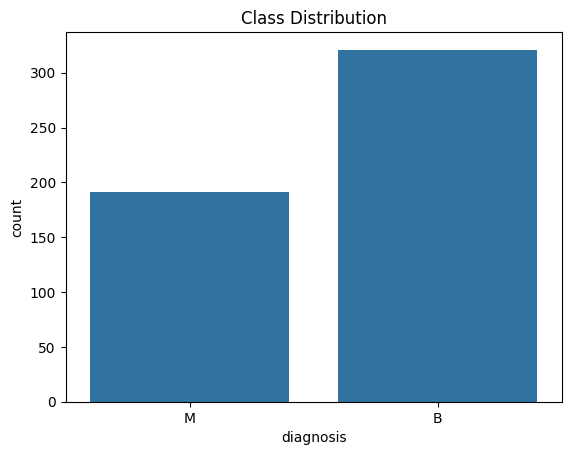

In [ ]:
# Visualize the distribution of the target variable
sns.countplot(data=df, x='diagnosis')
plt.title("Class Distribution")

6. Feature Visualization

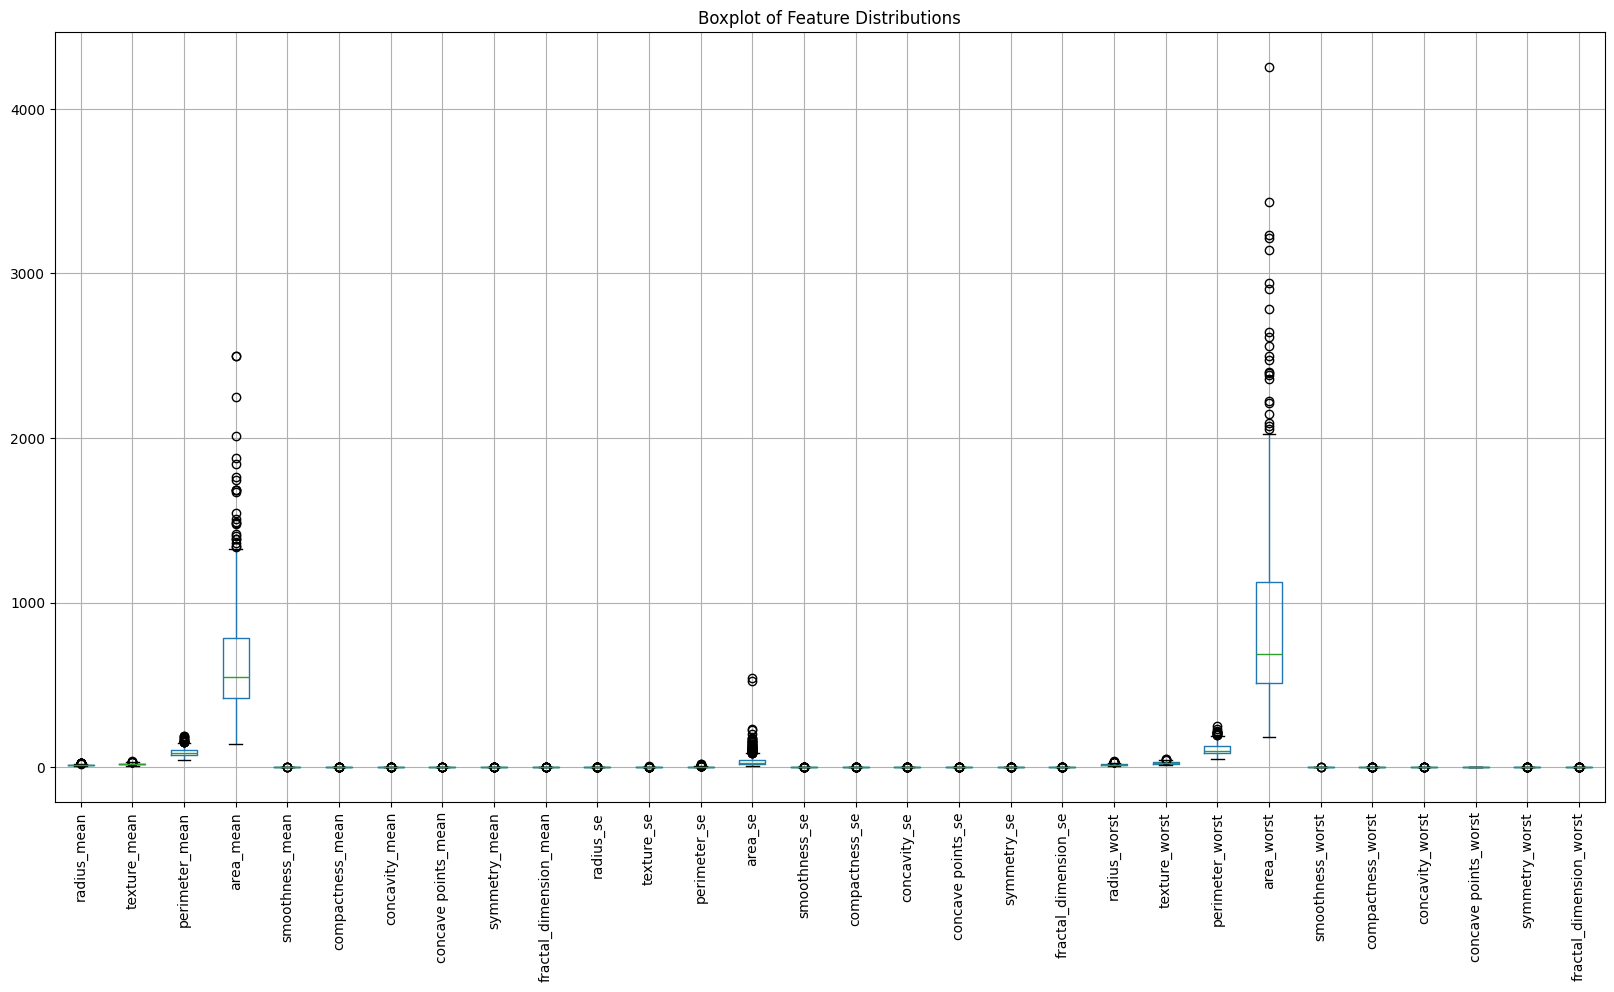

In [ ]:
# Boxplot of all 30 features except 'diagnosis'
features = df.drop(columns='diagnosis').columns

plt.figure(figsize=(20, 10))
df[features].boxplot(rot=90)
plt.title("Boxplot of Feature Distributions")
plt.show()

Text(0.5, 1.0, 'Feature Correlation Heatmap')

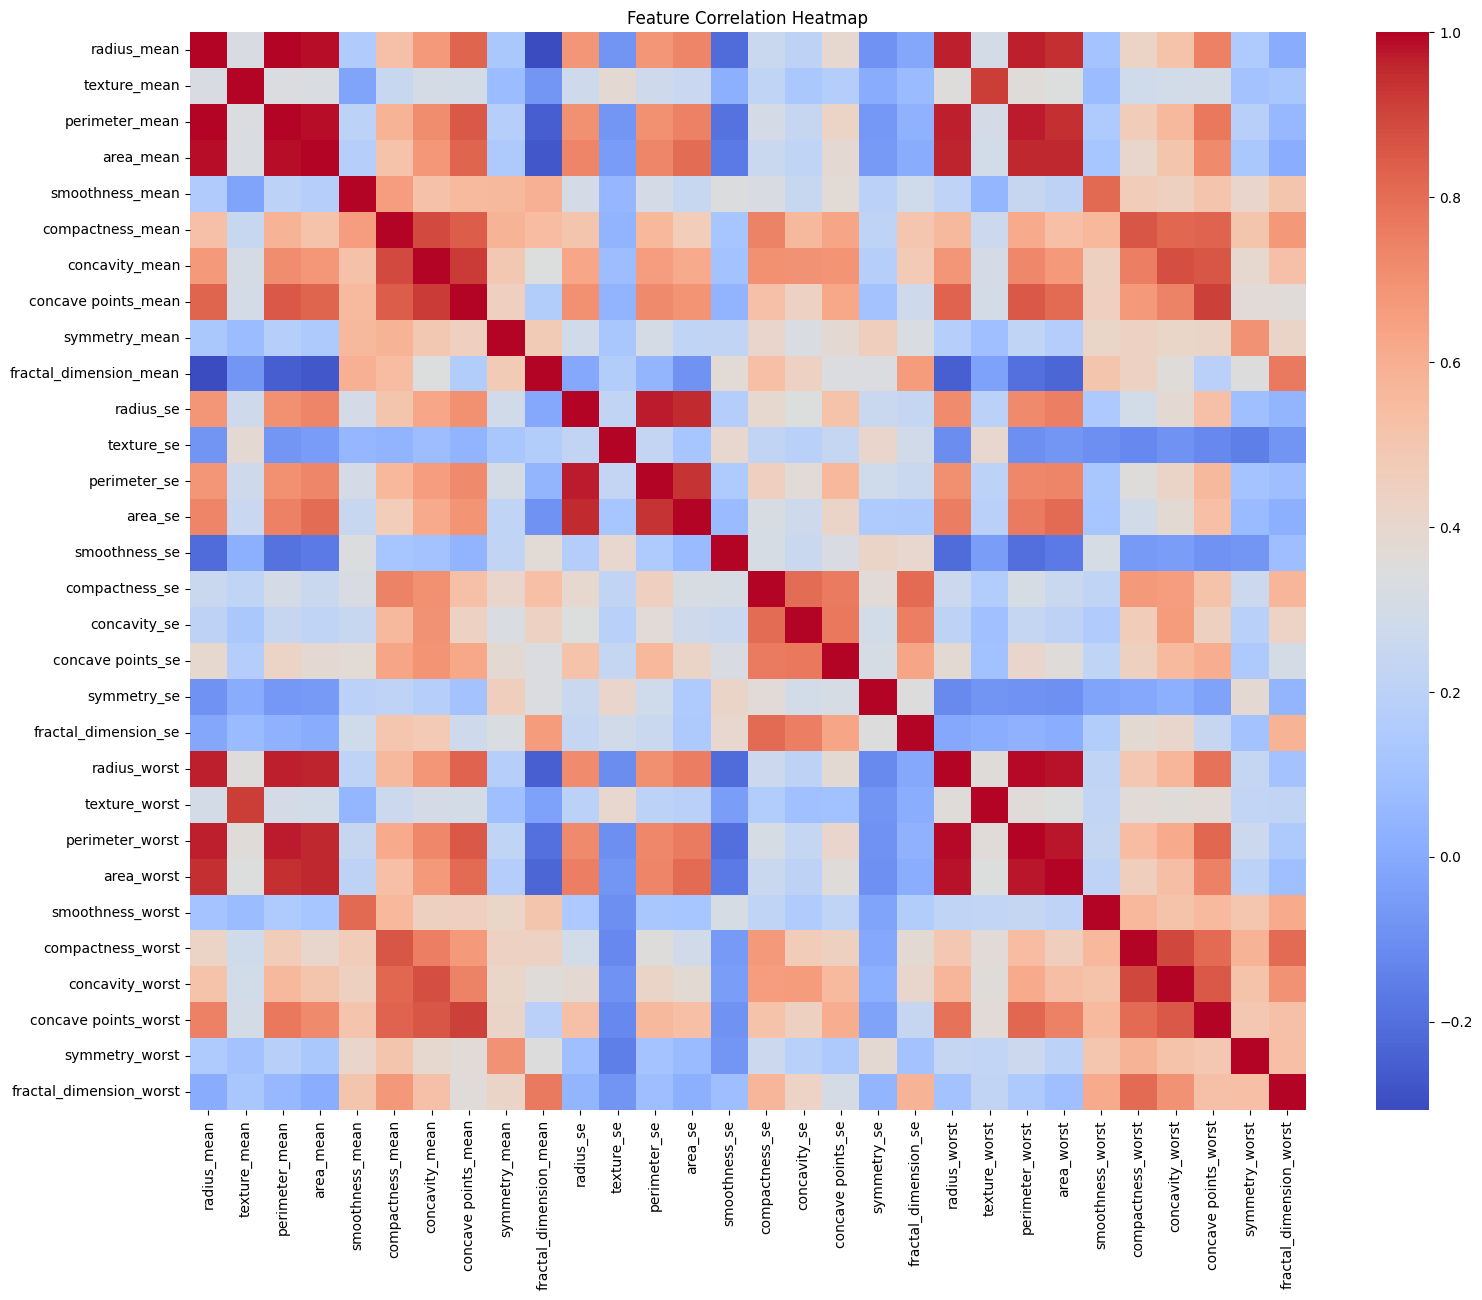

In [ ]:
# Correlation heatmap to visualize relationships between features
plt.figure(figsize=(18, 14))
sns.heatmap(df.drop(columns='diagnosis').corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")

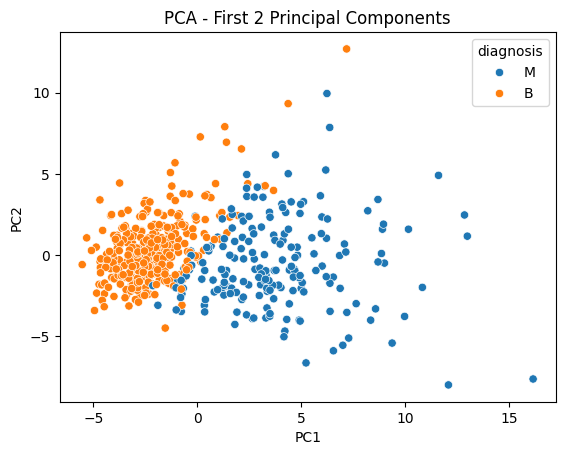

In [ ]:
# PCA for dimensionality reduction

# Temporary median imputation
df_pca = df.copy()
df_pca.fillna(df_pca.median(numeric_only=True), inplace=True)

# Drop target column
X = df_pca.drop(columns='diagnosis')

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA transformation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['diagnosis'] = df_pca['diagnosis']

# Plot PCA results
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='diagnosis')
plt.title("PCA - First 2 Principal Components")
plt.show()


7. Save the processed dataset 

In [ ]:
# Save the final dataset in the data directory
df.to_csv("../data/breast_cancer_final.csv", index=False)